<a href="https://colab.research.google.com/github/Divyanshi-16/Adversarial-Robustness/blob/main/FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model:** Feed-Forward Neural Network

In [ ]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score

with ZipFile('mnist_train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_train')

with ZipFile('mnist_test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_test')

train_data = pd.read_csv('mnist_train/mnist_train.csv')
test_data = pd.read_csv('mnist_test/mnist_test.csv')

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the model
initial_learning_rate = 0.001
opt = Adam(lr=initial_learning_rate)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduling
def lr_schedule(epoch):
    return initial_learning_rate * 0.9 ** epoch

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')
y_pred = np.argmax(model.predict(x_test), axis=1)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5453 - accuracy: 0.8402 - val_loss: 0.1924 - val_accuracy: 0.9502 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3155 - accuracy: 0.9133 - val_loss: 0.1532 - val_accuracy: 0.9630 - lr: 9.0000e-04
Epoch 3/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2695 - accuracy: 0.9291 - val_loss: 0.1370 - val_accuracy: 0.9718 - lr: 8.1000e-04
Epoch 4/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2448 - accuracy: 0.9369 - val_loss: 0.1249 - val_accuracy: 0.9738 - lr: 7.2900e-04
Epoch 5/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2317 - accuracy: 0.9419 - val_loss: 0.1203 - val_accuracy: 0.9752 - lr: 6.5610e-04
Epoch 6/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2143 - accuracy: 0.9464 - val_loss: 0.1129 - val_accuracy: 0.9788 - lr: 5.9049e-04
Epoch 7/20
1875/1875 [====

In [ ]:
!pip install torchattacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninsta

In [ ]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
import torchattacks
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score

with ZipFile('mnist_train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_train')

with ZipFile('mnist_test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_test')

train_data = pd.read_csv('mnist_train/mnist_train.csv')
test_data = pd.read_csv('mnist_test/mnist_test.csv')

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the TensorFlow Keras model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the TensorFlow Keras model
initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the TensorFlow Keras model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Define the PyTorch model
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return F.softmax(x, dim=1)

# Instantiate the PyTorch model
pytorch_model = PyTorchModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pytorch_model.to(device)

# Generate adversarial examples using FGSM attack
fgsm_attack = torchattacks.FGSM(pytorch_model, eps=0.3)
x_test_adv = fgsm_attack(torch.tensor(x_test, dtype=torch.float32).to(device),
                         torch.tensor(y_test, dtype=torch.long).to(device))

# Convert adversarial examples to numpy array
x_test_adv_numpy = x_test_adv.cpu().numpy()

# Evaluate TensorFlow Keras model on adversarial test data
adv_test_loss, adv_test_accuracy = model.evaluate(x_test_adv_numpy, y_test)
print(f'Test accuracy on adversarial examples: {adv_test_accuracy}')

y_pred_keras = np.argmax(model.predict(x_test_adv_numpy), axis=1)
precision_keras = precision_score(y_test, y_pred_keras, average='macro')
recall_keras = recall_score(y_test, y_pred_keras, average='macro')

print(f'Precision for TensorFlow Keras model: {precision_keras}')
print(f'Recall for TensorFlow Keras model: {recall_keras}')

Epoch 1/20
1875/1875 [==============================] - 27s 12ms/step - loss: 0.2736 - accuracy: 0.9262 - val_loss: 0.1547 - val_accuracy: 0.9614
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1562 - accuracy: 0.9607 - val_loss: 0.1296 - val_accuracy: 0.9697
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1300 - accuracy: 0.9697 - val_loss: 0.1290 - val_accuracy: 0.9698
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1227 - accuracy: 0.9725 - val_loss: 0.1318 - val_accuracy: 0.9720
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1155 - accuracy: 0.9762 - val_loss: 0.1262 - val_accuracy: 0.9728
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1119 - accuracy: 0.9770 - val_loss: 0.1218 - val_accuracy: 0.9744
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1079 - accuracy: 0.9789 - val_loss: 0.1362 - val_accu

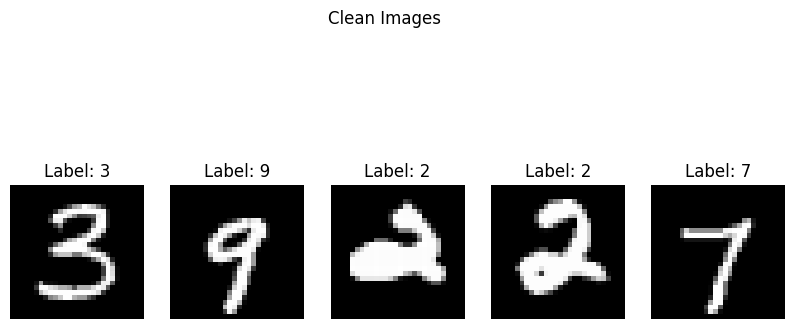

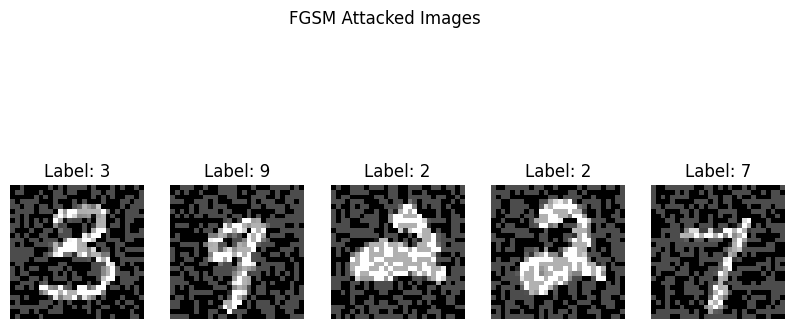

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with their labels
def display_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Choose a few random indices to display examples
num_examples = 5
random_indices = np.random.choice(len(x_test), num_examples)

# Display clean images
display_images(x_test[random_indices], y_test[random_indices], "Clean Images")

# Display FGSM attacked images
display_images(x_test_adv_numpy[random_indices], y_test[random_indices], "FGSM Attacked Images")

In [ ]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
import torchattacks
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score

with ZipFile('mnist_train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_train')

with ZipFile('mnist_test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('mnist_test')

train_data = pd.read_csv('mnist_train/mnist_train.csv')
test_data = pd.read_csv('mnist_test/mnist_test.csv')

x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the TensorFlow Keras model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the TensorFlow Keras model
initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the TensorFlow Keras model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Define the PyTorch model
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return F.softmax(x, dim=1)

# Instantiate the PyTorch model
pytorch_model = PyTorchModel()

# Load PyTorch model to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pytorch_model.to(device)

# Generate adversarial examples using PGD attack
pgd_attack = torchattacks.PGD(pytorch_model, eps=0.3, alpha=0.01, steps=40)
x_test_adv = pgd_attack(torch.tensor(x_test, dtype=torch.float32).to(device),
                        torch.tensor(y_test, dtype=torch.long).to(device))

# Convert adversarial examples to numpy array
x_test_adv_numpy = x_test_adv.cpu().numpy()

# Evaluate TensorFlow Keras model on adversarial test data
adv_test_loss, adv_test_accuracy = model.evaluate(x_test_adv_numpy, y_test)
print(f'Adversarial test accuracy: {adv_test_accuracy}')

# Calculate precision and recall for TensorFlow Keras model
y_pred_keras = np.argmax(model.predict(x_test_adv_numpy), axis=1)
precision_keras = precision_score(y_test, y_pred_keras, average='macro')
recall_keras = recall_score(y_test, y_pred_keras, average='macro')

print(f'Precision for TensorFlow Keras model: {precision_keras}')
print(f'Recall for TensorFlow Keras model: {recall_keras}')

Epoch 1/20
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2742 - accuracy: 0.9261 - val_loss: 0.1548 - val_accuracy: 0.9612
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1616 - accuracy: 0.9603 - val_loss: 0.1325 - val_accuracy: 0.9695
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1364 - accuracy: 0.9687 - val_loss: 0.1273 - val_accuracy: 0.9728
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1273 - accuracy: 0.9727 - val_loss: 0.1199 - val_accuracy: 0.9735
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1173 - accuracy: 0.9751 - val_loss: 0.1214 - val_accuracy: 0.9746
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1102 - accuracy: 0.9778 - val_loss: 0.1198 - val_accuracy: 0.9761
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1080 - accuracy: 0.9796 - val_loss: 0.1187 - val_ac

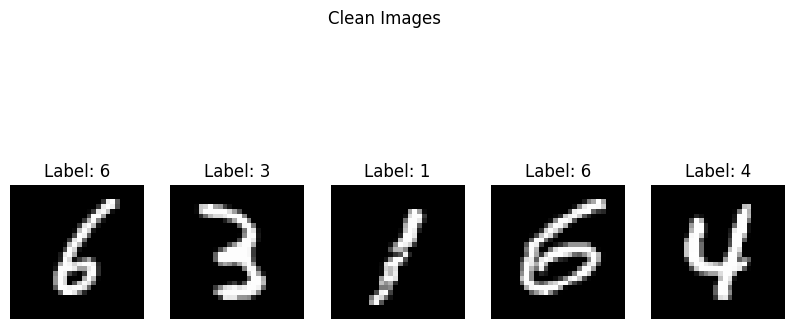

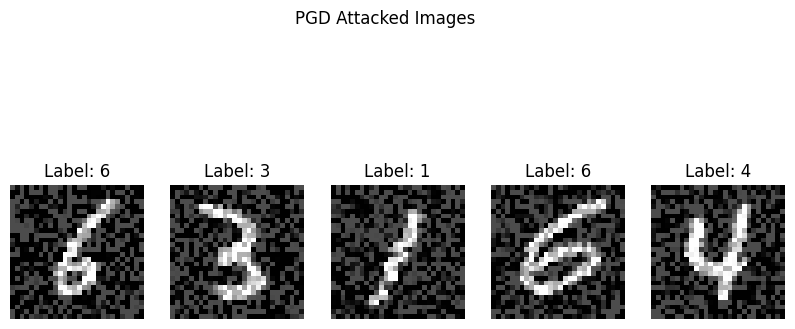

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with their labels
def display_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Choose a few random indices to display examples
num_examples = 5
random_indices = np.random.choice(len(x_test), num_examples)

# Display clean images
display_images(x_test[random_indices], y_test[random_indices], "Clean Images")

# Display PGD attacked images
display_images(x_test_adv_numpy[random_indices], y_test[random_indices], "PGD Attacked Images")

In [ ]:
# Generate adversarial examples using DeepFool attack
deepfool_attack = torchattacks.DeepFool(pytorch_model)
x_test_adv_deepfool = deepfool_attack(torch.tensor(x_test, dtype=torch.float32).to(device),
                                       torch.tensor(y_test, dtype=torch.long).to(device))

# Convert adversarial examples to numpy array
x_test_adv_deepfool_numpy = x_test_adv_deepfool.cpu().numpy()


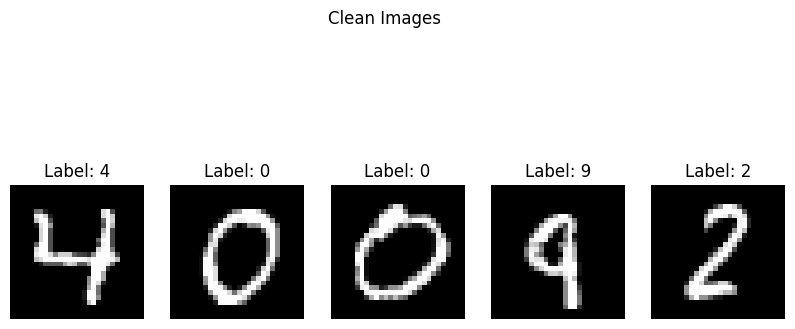

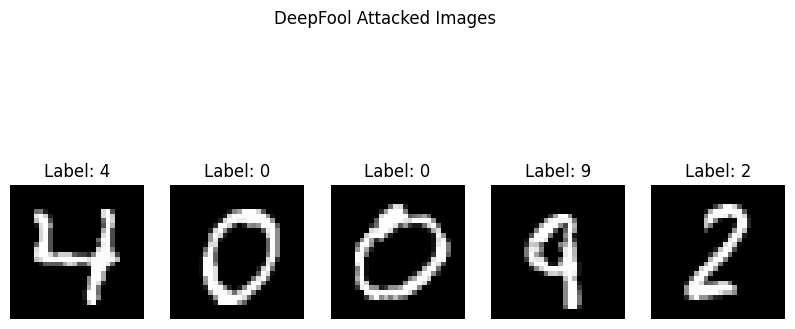

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with their labels
def display_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Choose a few random indices to display examples
num_examples = 5
random_indices = np.random.choice(len(x_test), num_examples)

# Display clean images
display_images(x_test[random_indices], y_test[random_indices], "Clean Images")



# Display DeepFool attacked images
display_images(x_test_adv_deepfool_numpy[random_indices], y_test[random_indices], "DeepFool Attacked Images")
